# Prediksi Gas CO dan NOx Pada Turbin Gas Pembangkit Listrik

## _Random Forest Regression_

In [1]:
#Created by Rakha Wisnu Bagaskara
#Nuclear and Physics Engineering Department
#Gadjah Mada University

# _Data Understanding_

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_excel("Dataset_gabungan.xlsx")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [8]:
dfshape = df.shape
print(dfshape)

(36733, 11)


## _Checking Data Missing Value_

In [7]:
dfisna = df.isna().sum()
print(dfisna)

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


## _Checking Data Types_

In [9]:
dftypes = df.dtypes
print(dftypes)

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object


## _Describe Data Statistic_

In [6]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [10]:
df.AH[df.AH > 100]=100
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.865589,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.459166,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.000000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


## _Check Data Correlation_

In [15]:
dfcorr = df.corr(method='pearson')
pd.DataFrame(dfcorr)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.406601,-0.476283,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,-0.406601,1.000000,-0.015127,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.476283,-0.015127,1.000000,-0.147862,-0.235164,-0.221822,0.022972,-0.137371,-0.196282,0.106587,0.164577
AFDP,0.251974,-0.040363,-0.147862,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.045851,0.057533,-0.235164,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,0.183706,-0.005390,-0.221822,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.281869,-0.225601,0.022972,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.091152,0.118224,-0.137371,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,0.015287,0.102636,-0.196282,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256
CO,-0.174326,0.067050,0.106587,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000,0.340606


# _Data Visualization_

## _Heat Map_

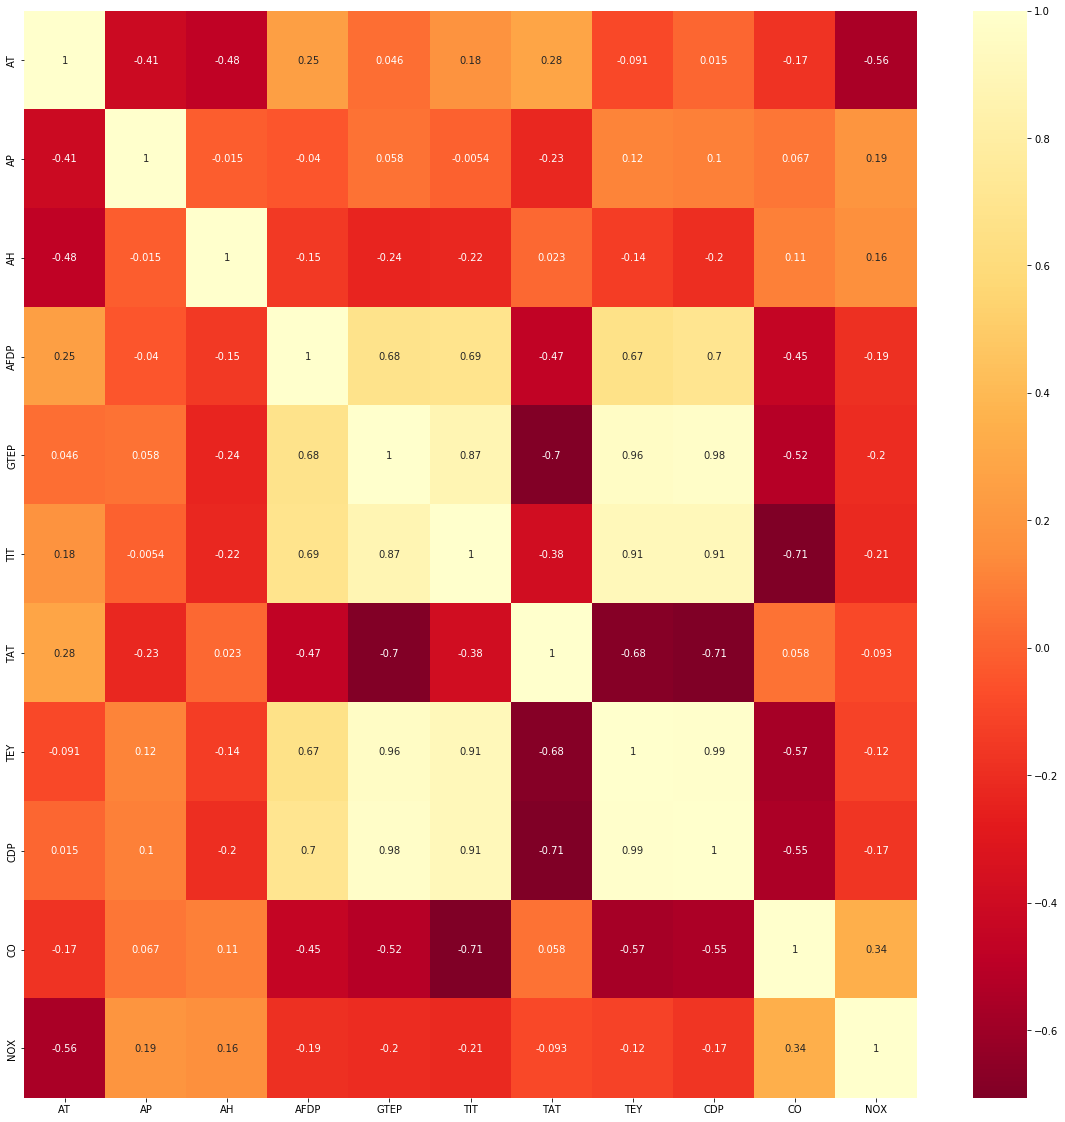

In [16]:
top_corr_features = dfcorr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlOrRd_r")

## _Histogram_

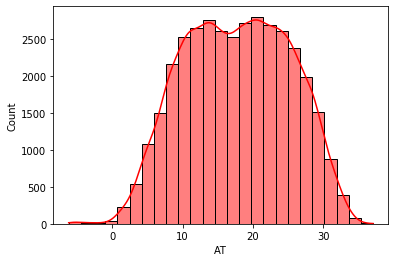

In [18]:
sns.histplot(data = df, x = "AT", bins = 25, kde = True, color = "Red",
            stat = "count", common_norm=False)
plt.show()

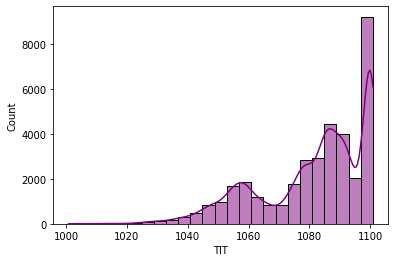

In [20]:
sns.histplot(data = df, x = "TIT", bins = 25, kde = True, color = "Purple",
            stat = "count", common_norm=False)
plt.show()

# _Data Preparation_

## Analisis _Feature Importance_

In [21]:
X_all = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']]
y_CO = df['CO']
y_NOX = df['NOX']

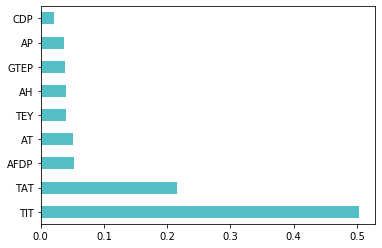

[0.05083773 0.03699124 0.03955704 0.05299165 0.03801698 0.50408508
 0.21489438 0.0407325  0.02189339]


In [23]:
model = RandomForestRegressor()
model.fit(X_all,y_CO)

feat_importances = pd.Series(model.feature_importances_, index=X_all.columns)
feat_importances.nlargest(10).plot(kind='barh',color='#54BEC7')
plt.show()
print(model.feature_importances_)

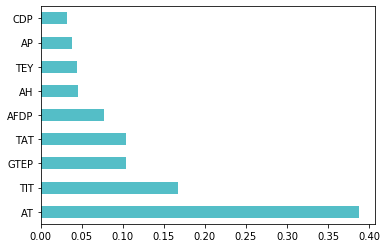

[0.38812235 0.03789995 0.0460825  0.077007   0.10430328 0.16713625
 0.10355936 0.04397963 0.03190969]


In [25]:
model = RandomForestRegressor()
model.fit(X_all,y_NOX)

feat_importances = pd.Series(model.feature_importances_, index=X_all.columns)
feat_importances.nlargest(10).plot(kind='barh', color='#54BEC7')
plt.show()
print(model.feature_importances_)

## _Feature Select_

In [ ]:
X_NOx = df[['AT','TIT', 'GTEP', 'AFDP']]
y_NOx = df[['NOX']]

X_CO = df[['GTEP', 'TIT', 'TEY', 'CDP']]
y_CO = df[['CO']]

In [ ]:
X_NOx_train, X_NOx_test, y_NOx_train, y_NOx_test = train_test_split(X_NOx, y_NOx, 
                                                                    test_size=0.2, 
                                                                    random_state=42)

X_CO_train, X_CO_test, y_CO_train, y_CO_test = train_test_split(X_CO, y_CO, 
                                                                test_size=0.2, 
                                                                random_state=42)

## _Standarization_

In [ ]:
trans = MinMaxScaler()
X_NOx_train = trans.fit_transform(X_NOx_train)
y_NOx_train = trans.fit_transform(y_NOx_train)
X_NOx_test = trans.fit_transform(X_NOx_test)
y_NOx_test = trans.fit_transform(y_NOx_test)


print(X_NOx_train)
print('='*20)
print(y_NOx_train)

In [ ]:
X_CO_train = trans.fit_transform(X_CO_train)
y_CO_train = trans.fit_transform(y_CO_train)
X_CO_test = trans.fit_transform(X_CO_test)
y_CO_test = trans.fit_transform(y_CO_test)

print(X_CO_train)
print('='*20)
print(y_CO_train)

# _Data Modelling_

### Prediksi Gas NOx

In [ ]:
rf_NOx = RandomForestRegressor(n_estimators=100,max_features='auto', 
                               min_samples_split=2,
                               max_depth=3,min_samples_leaf = 15)
rf_NOx.fit(X_NOx_train,y_NOx_train.ravel())

y_pred_NOx = rf_NOx.predict(X_NOx_train)
mae_NOx = mean_absolute_error(y_NOx_train,y_pred_NOx)
mse_NOx = mean_squared_error(y_NOx_train,y_pred_NOx)
rmse_NOx = math.sqrt(mse_NOx)

print("Train Mean Absolute Error = ", mae_NOx)
print("Train Mean Squared Error = ", mse_NOx)
print("Train Root Mean Squared Error = ", rmse_NOx)

print('='*50)

y_pred_test = rf_NOx.predict(X_NOx_test)
mae_NOx_test = mean_absolute_error(y_NOx_test,y_pred_test)
mse_NOx_test = mean_squared_error(y_NOx_test,y_pred_test)
rmse_NOx_test = math.sqrt(mse_NOx_test)

print("Test Mean Absolute Error = ", mae_NOx_test)
print("Test Mean Squared Error = ", mse_NOx_test)
print("Test Root Mean Squared Error = ", rmse_NOx_test)

### Prediksi Gas CO

In [ ]:
rf_CO = RandomForestRegressor(n_estimators=100,max_features='auto', 
                              min_samples_split=2,
                              max_depth=3,min_samples_leaf = 15)
rf_CO.fit(X_CO_train,y_CO_train.ravel())

y_pred_CO = rf_CO.predict(X_CO_train)
mae_CO = mean_absolute_error(y_CO_train,y_pred_CO)
mse_CO = mean_squared_error(y_CO_train,y_pred_CO)
rmse_CO = math.sqrt(mse_CO)

print("Train Mean Absolute Error = ", mae_CO)
print("Train Mean Squared Error = ", mse_CO)
print("Train Root Mean Squared Error = ", rmse_CO)

print('='*50)

y_pred_testCO = rf_CO.predict(X_CO_test)
mae_CO_test = mean_absolute_error(y_CO_test,y_pred_testCO)
mse_CO_test = mean_squared_error(y_CO_test,y_pred_testCO)
rmse_CO_test = math.sqrt(mse_CO_test)

print("Test Mean Absolute Error = ", mae_CO_test)
print("Test Mean Squared Error = ", mse_CO_test)
print("Test Root Mean Squared Error = ", rmse_CO_test)